In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("./data/LULU.csv")

# fillin missing dates
data['Date'] = pd.to_datetime(data.Date)
min_date = data.Date.min()
max_date = data.Date.max()

data.set_index("Date", inplace = True)
idx = pd.date_range(min_date, max_date)
data = data.reindex(idx).ffill(axis=0)

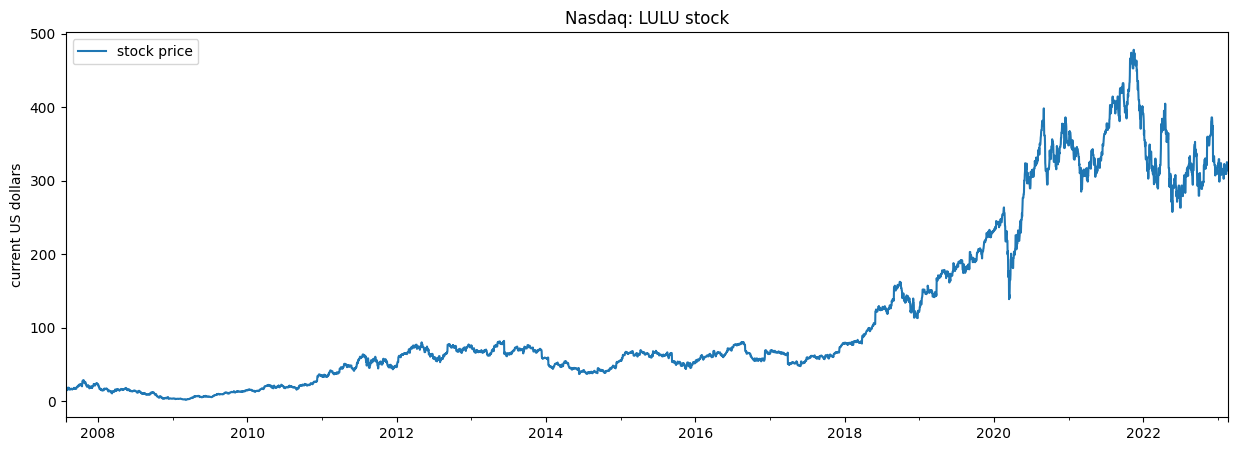

In [3]:
fig, ax = plt.subplots(figsize = (15,5))

close = data.Close
close.plot(kind = "line", ax = ax, label = "stock price")
ax.set_title("Nasdaq: LULU stock")
ax.set_ylabel("current US dollars")
plt.legend()
plt.show()

In [4]:
import tensorflow
print('tensorflow: %s' % tensorflow.__version__)
# keras
import keras
print('keras: %s' % keras.__version__)

2023-03-28 16:02:55.200580: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-03-28 16:02:55.823477: I tensorflow/core/util/port.cc:104] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-03-28 16:02:55.939233: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-03-28 16:02:55.939265: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore 

tensorflow: 2.11.0
keras: 2.11.0


In [5]:
from numpy import array
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
 
# split a univariate sequence into samples
def split_sequence(sequence, n_steps):
    X, y = list(), list()
    for i in range(len(sequence)):
        # find the end of this pattern
        end_ix = i + n_steps
        # check if we are beyond the sequence
        if end_ix > len(sequence)-1:
            break
        # gather input and output parts of the pattern
        seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return array(X), array(y)
 
# define input sequence
raw_seq = close
# choose a number of time steps
n_steps = 30
# split into samples
X, y = split_sequence(raw_seq, n_steps)
# reshape from [samples, timesteps] into [samples, timesteps, features]
n_features = 1
X = X.reshape((X.shape[0], X.shape[1], n_features))
# define model
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(n_steps, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
# fit model
model.fit(X, y, epochs=50, verbose=1)
# demonstrate prediction
x_input = array(raw_seq[-n_steps:])
x_input = x_input.reshape((1, n_steps, n_features))
yhat = model.predict(x_input, verbose=0)
print(yhat)

2023-03-28 16:03:06.480216: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:967] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-03-28 16:03:06.480379: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-03-28 16:03:06.480706: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublas.so.11'; dlerror: libcublas.so.11: cannot open shared object file: No such file or directory
2023-03-28 16:03:06.480761: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublasLt.so.11'; dlerror: libcublasLt.so.11: cannot open shared object file: No such file or directory
2023-03-28 16:03:06.480791: W tensorf

Epoch 1/50
177/177 [==============================] - 3s 10ms/step - loss: 1627.2499
Epoch 2/50
177/177 [==============================] - 2s 10ms/step - loss: 144.7650
Epoch 3/50
177/177 [==============================] - 2s 10ms/step - loss: 111.2961
Epoch 4/50
177/177 [==============================] - 2s 10ms/step - loss: 124.7996
Epoch 5/50
177/177 [==============================] - 2s 10ms/step - loss: 130.6204
Epoch 6/50
177/177 [==============================] - 2s 10ms/step - loss: 66.4319
Epoch 7/50
177/177 [==============================] - 2s 10ms/step - loss: 60.8308
Epoch 8/50
177/177 [==============================] - 2s 10ms/step - loss: 63.0111
Epoch 9/50
177/177 [==============================] - 2s 10ms/step - loss: 54.7151
Epoch 10/50
177/177 [==============================] - 2s 10ms/step - loss: 59.4720
Epoch 11/50
177/177 [==============================] - 2s 10ms/step - loss: 56.4375
Epoch 12/50
177/177 [==============================] - 2s 11ms/step - loss: 57.

In [54]:
# define input sequence
raw_seq = [10, 20, 30, 40, 50, 60, 70, 80, 90]
# choose a number of time steps
n_steps = 3
# split into samples
X, y = split_sequence(raw_seq, n_steps)


print(X)

[[10 20 30]
 [20 30 40]
 [30 40 50]
 [40 50 60]
 [50 60 70]
 [60 70 80]]


In [55]:
print(y)

[40 50 60 70 80 90]


In [56]:
X.shape[0] #filas

6

In [57]:
X.shape[1] #columnas

3

In [58]:
n_features

1

In [61]:
X.shape

(6, 3)

In [62]:
X.reshape((X.shape[0], X.shape[1], n_features))

array([[[10],
        [20],
        [30]],

       [[20],
        [30],
        [40]],

       [[30],
        [40],
        [50]],

       [[40],
        [50],
        [60]],

       [[50],
        [60],
        [70]],

       [[60],
        [70],
        [80]]])

# Multi-step LSTM Model

In [6]:
# split a univariate sequence into samples
def split_sequence(sequence, n_steps_in, n_steps_out):
    X, y = list(), list()
    for i in range(len(sequence)):
        # find the end of this pattern
        end_ix = i + n_steps_in
        out_end_ix = end_ix + n_steps_out
        # check if we are beyond the sequence
        if out_end_ix > len(sequence):
            break
    # gather input and output parts of the pattern
        seq_x, seq_y = sequence[i:end_ix], sequence[end_ix:out_end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y)

In [7]:
#testing over last N year 
d = 365
dtrain, train_idx = close[:-d], close[:-d].index
dtest, test_idx = close[-d:], close[-d:].index

In [8]:
#scaling data 
from sklearn.preprocessing import MinMaxScaler


scaler = MinMaxScaler() 
dtrain_reshaped = dtrain.values.reshape(-1,1)
dtest_reshaped = dtest.values.reshape(-1,1)
transformer = scaler.fit(dtrain_reshaped)

dtrain_scaled = transformer.transform(dtrain_reshaped)
dtest_scaled = transformer.transform(dtest_reshaped)

In [9]:
# define training input sequence
raw_seq_train = dtrain_scaled.reshape(len(dtrain), ) 

# choose a number of time steps
n_steps_in, n_steps_out = 30, 1  #uses the last 30 days to predict the next day
# split into samples
X_train, y_train = split_sequence(raw_seq_train, n_steps_in, n_steps_out)
# reshape from [samples, timesteps] into [samples, timesteps, features]
n_features = 1 #because is univariate
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], n_features))

In [10]:
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from keras.layers import Dense

# parameters 
units = 100 
# dropout = 0.1
optimizer = "adam"
loss = "mse"
epochs = 20
val_split = 0.1


# define model
model = Sequential()
# model.add(LSTM(units = units, activation='relu', return_sequences=True, input_shape=(n_steps_in, n_features)))
# model.add(Dropout(rate=dropout))
model.add(LSTM(units = units, activation='relu', input_shape=(n_steps_in, n_features)))
model.add(Dense(n_steps_out))
model.compile(optimizer = optimizer, loss = loss)

# fit model
history = model.fit(X_train, y_train, 
                    epochs = epochs, 
                    # batch_size = 32, 
                    validation_split = val_split, 
                    shuffle = False, 
                    verbose=1)

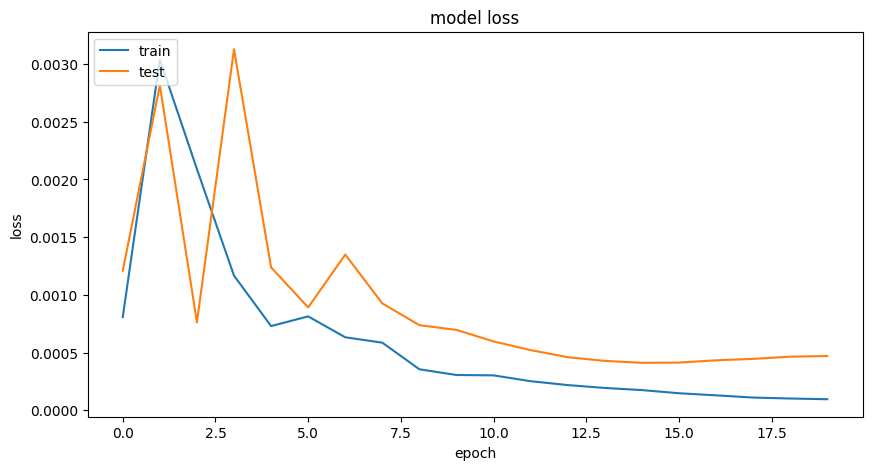

In [178]:
# history for loss
plt.figure(figsize = (10,5))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [179]:
# define testing input sequence
raw_seq_test = dtest_scaled.reshape(len(dtest), ) 


# split into samples
X_test, y_test = split_sequence(raw_seq_test, n_steps_in, n_steps_out)
# X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], n_features))

# prediction
y_hat = model.predict(X_test, verbose=0)

days = close[-y_hat.shape[0]:].index
y_hat_inv = transformer.inverse_transform(y_hat).reshape(y_hat.shape[0],).tolist()
y_test_inv = transformer.inverse_transform(y_test).reshape(y_test.shape[0],).tolist()
predictions = pd.DataFrame({
              "Date" : days,
              "Actual" : y_test_inv, 
              "Predicted" : y_hat_inv,
              "MA_AbsError": pd.Series(abs(np.array(y_test_inv) - np.array(y_hat_inv))).rolling(3,1).mean()
            }).set_index("Date")

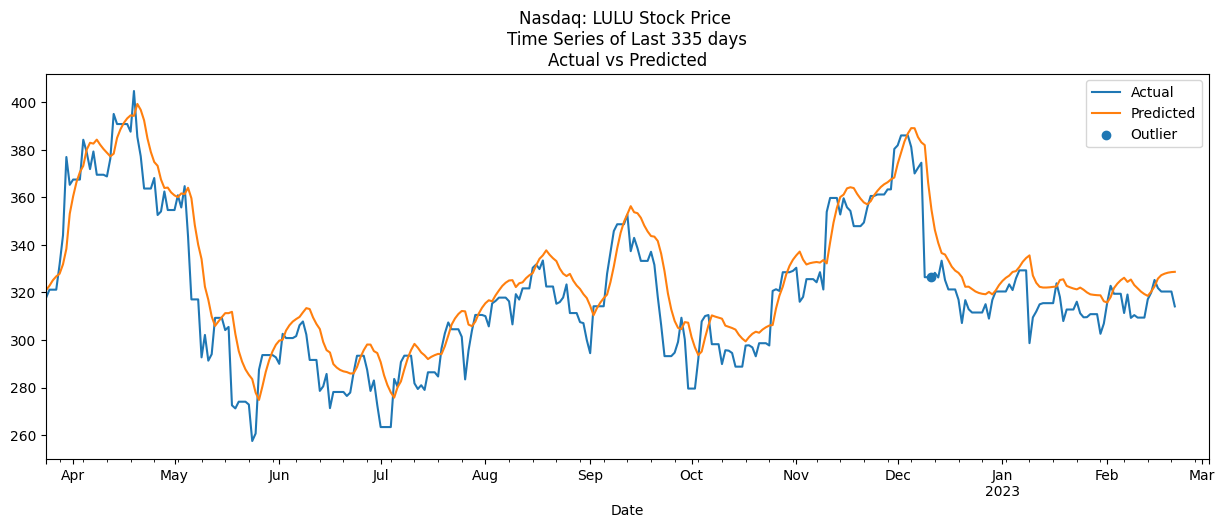

In [180]:
error = predictions.MA_AbsError
e25, e75 = np.percentile(error, [25,75])
iqr = e75 - e25
gap = 3
upper_whisker = error[error<=e75+gap*iqr].max()
lower_whisker = error[error>=e25-gap*iqr].min()

outliers_bool = (error<lower_whisker) | (error>upper_whisker)

fig, ax = plt.subplots(figsize = (15,5))

predictions.plot(kind = "line", y = "Actual", ax = ax)
predictions.plot(kind = "line", y = "Predicted", ax = ax)
if outliers_bool.sum()>0:
    ax.scatter(predictions[outliers_bool].index, predictions[outliers_bool].Actual, label="Outlier")
ax.set_title(f"Nasdaq: LULU Stock Price \nTime Series of Last {len(predictions)} days\nActual vs Predicted")
ax.set_xlim(np.min(predictions.index), np.max(predictions.index) + timedelta(10))
plt.legend()

plt.show()